## Import Modules

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

## Load the Dataset

In [22]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [23]:
# statistical info
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [24]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [26]:
# finding any null values in data
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [28]:
# Finding the number of males and females in the data
df.Genre.value_counts()

Female    112
Male       88
Name: Genre, dtype: int64

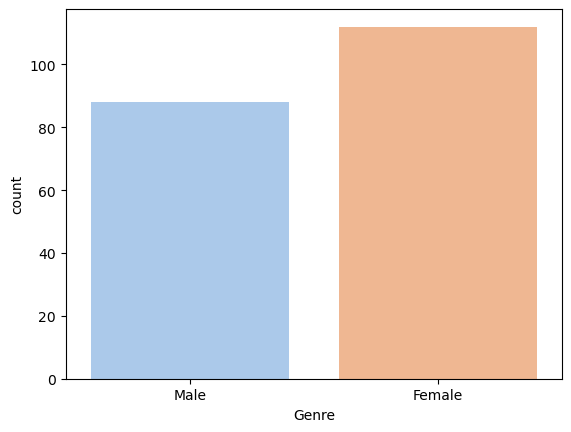

In [31]:
# Visualising the number of males and females in the data
sns.countplot(x="Genre",data=df,palette="pastel")
plt.show()

In [32]:
# Computing minimum and maximum age of customers
print(min(df.Age))
print(max(df.Age))

18
70


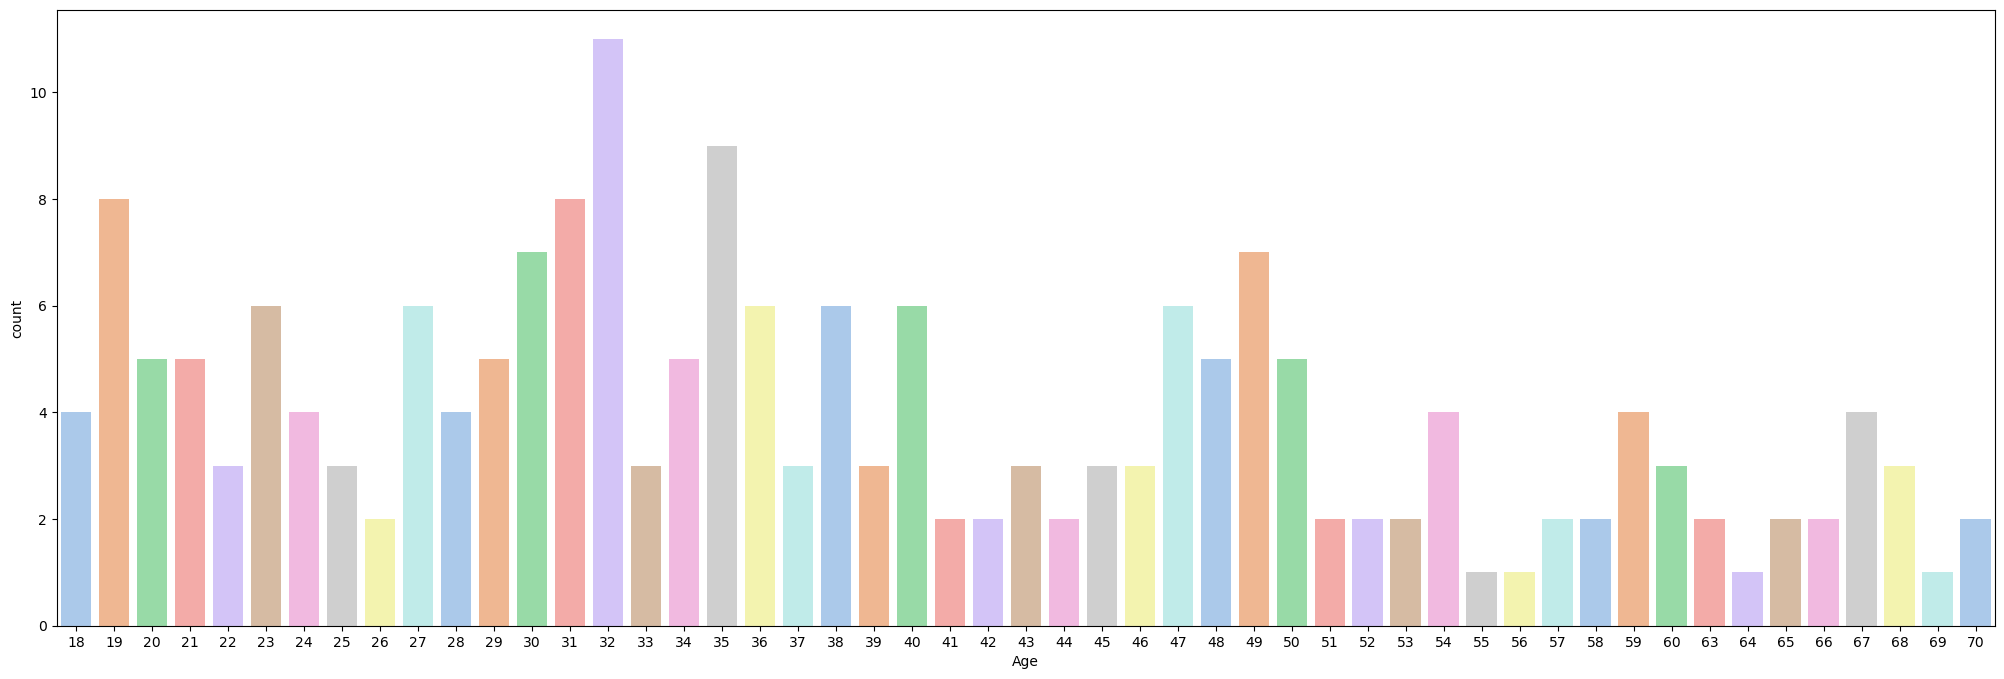

In [33]:
# Visualising the age distribution of customers
plt.figure(figsize=(25,8))
sns.countplot(x="Age",data=df,palette="pastel")
plt.show()

Customers with age 32 make for the largest number of customers.

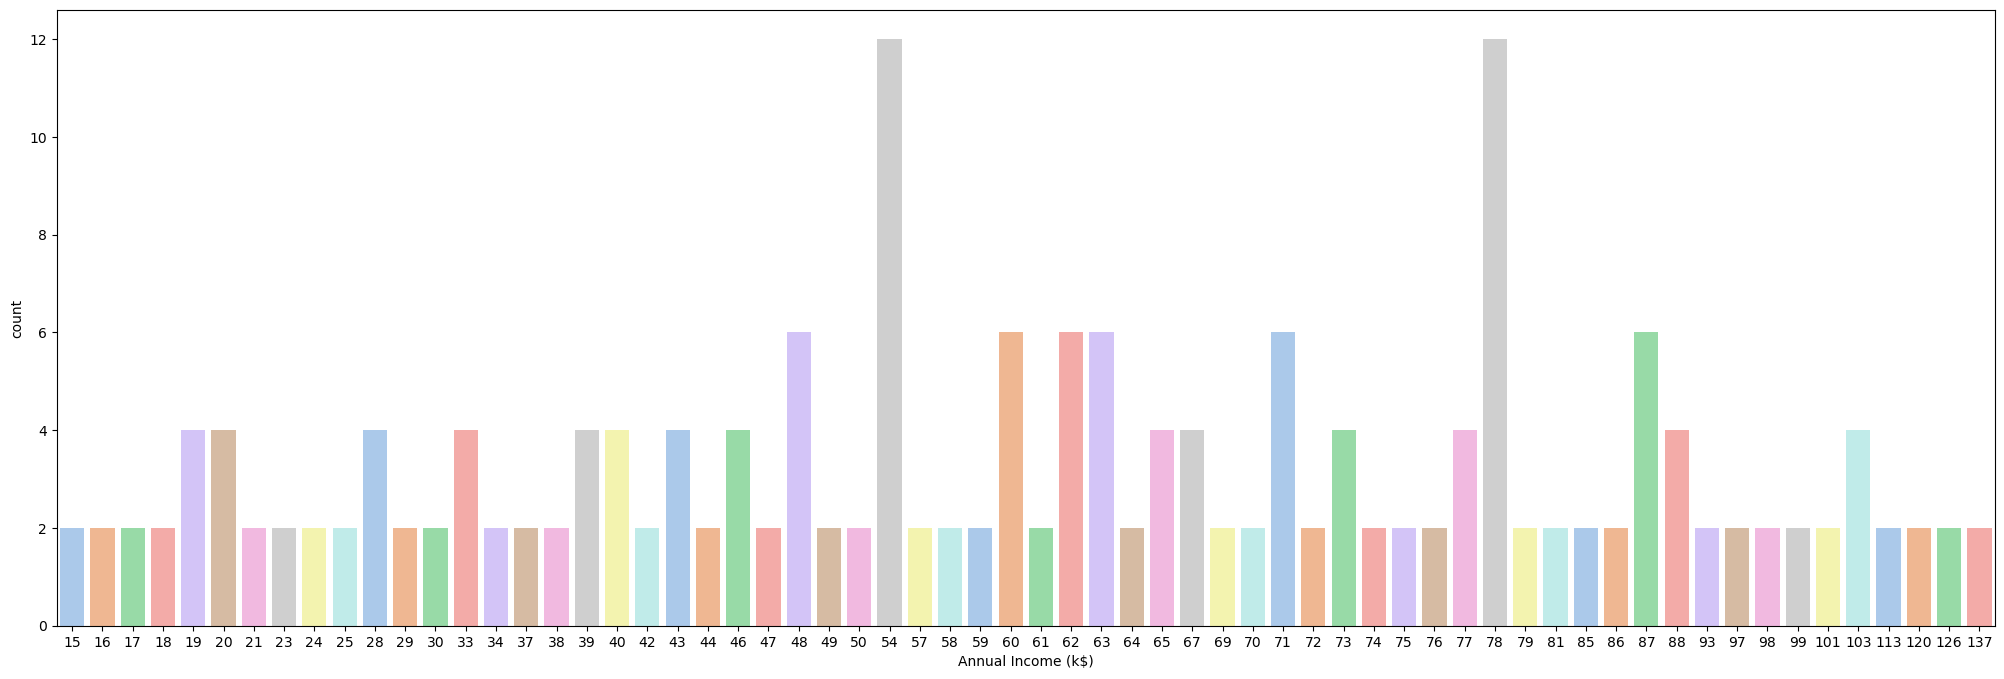

In [35]:
# Visualising the income distribution of customers
plt.figure(figsize=(25,8))
sns.countplot(x="Annual Income (k$)",data=df,palette="pastel")
plt.show()

Customers with annual income of 54k and 78k make for the largest number of customers.

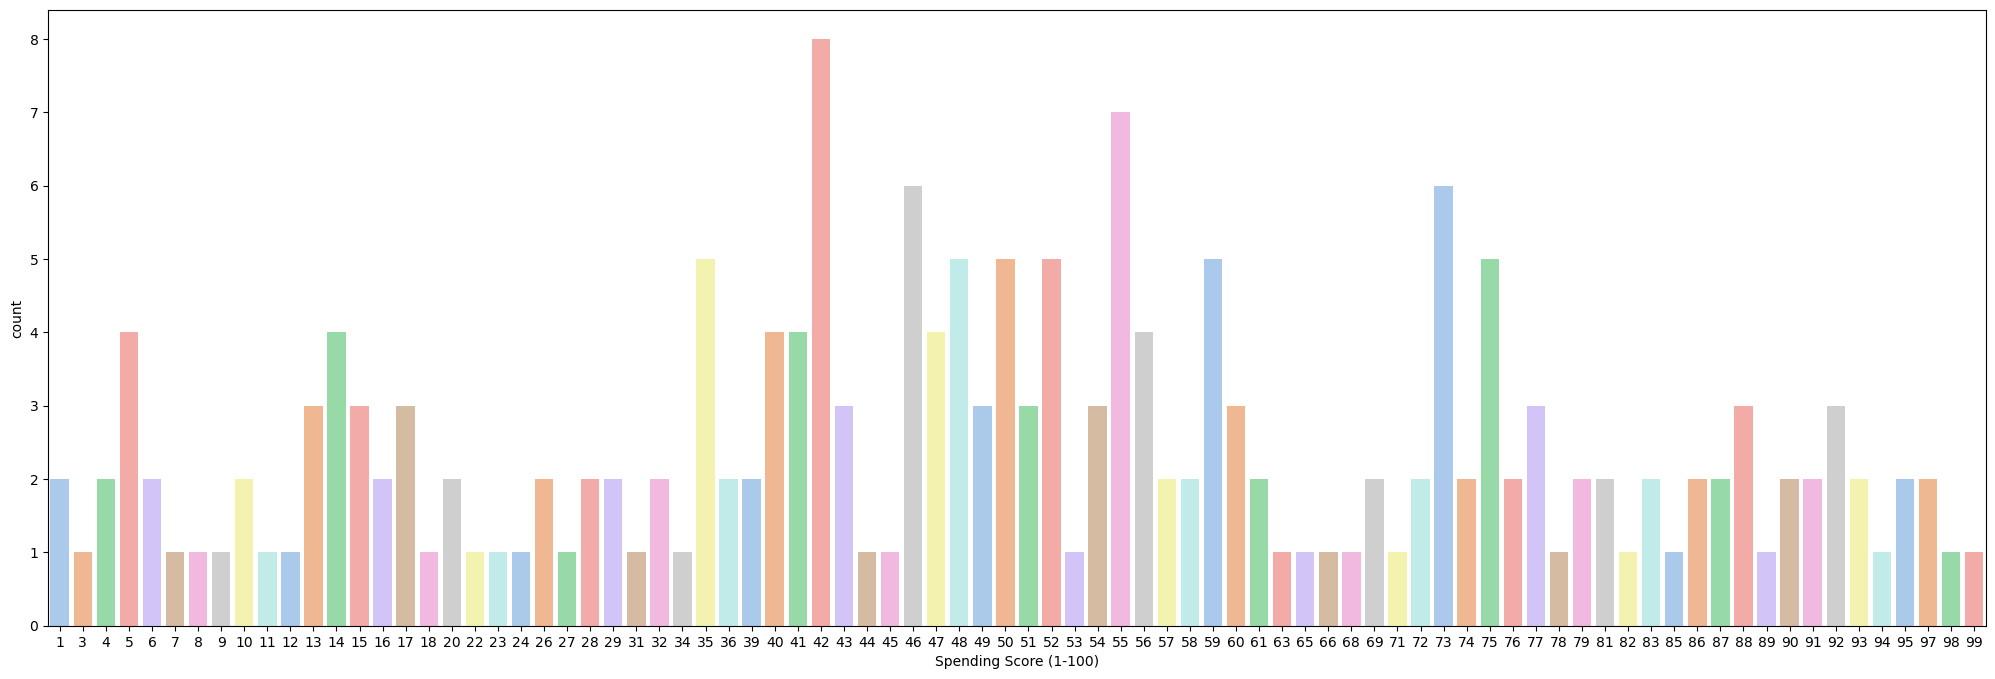

In [37]:
# Visualising the spending score of customers
plt.figure(figsize=(25,8))
sns.countplot(x="Spending Score (1-100)",data=df,palette="pastel")
plt.show()

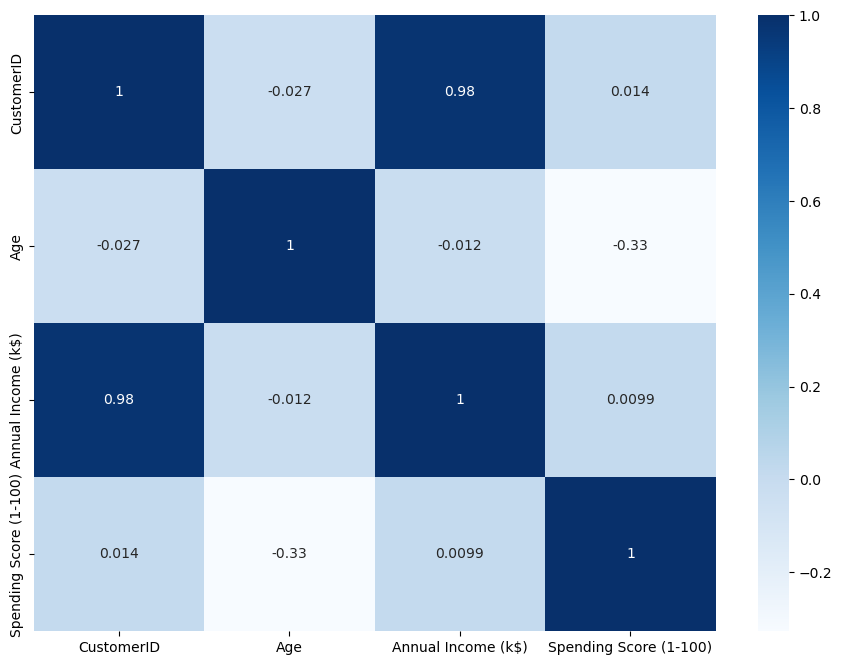

In [38]:
# Finding correaltion between all the parameters in the dataset.
fig,ax = plt.subplots(figsize=(11,8))
sns.heatmap(df.corr(),annot=True,cmap="Blues" ,ax=ax)
plt.show()

# k-means Clustering

Making clusters based on Annual income and Spending Score

In [13]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [14]:
# cluster on 2 features
df1 = df[['Annual Income (k$)', 'Spending Score (1-100)']]
df1.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

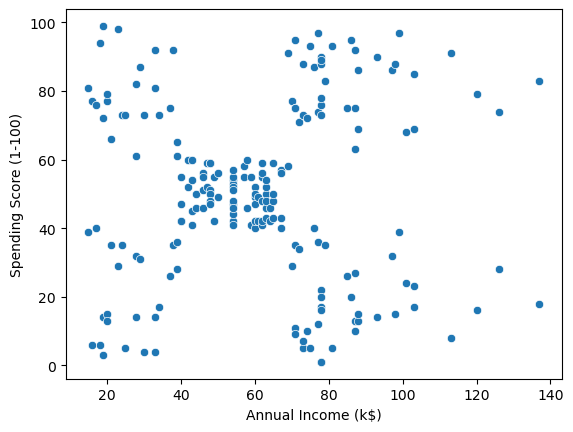

In [15]:
# scatter plot
sns.scatterplot(df1['Annual Income (k$)'], df1['Spending Score (1-100)'])

In [16]:
from sklearn.cluster import KMeans
errors = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df1)
    errors.append(kmeans.inertia_)

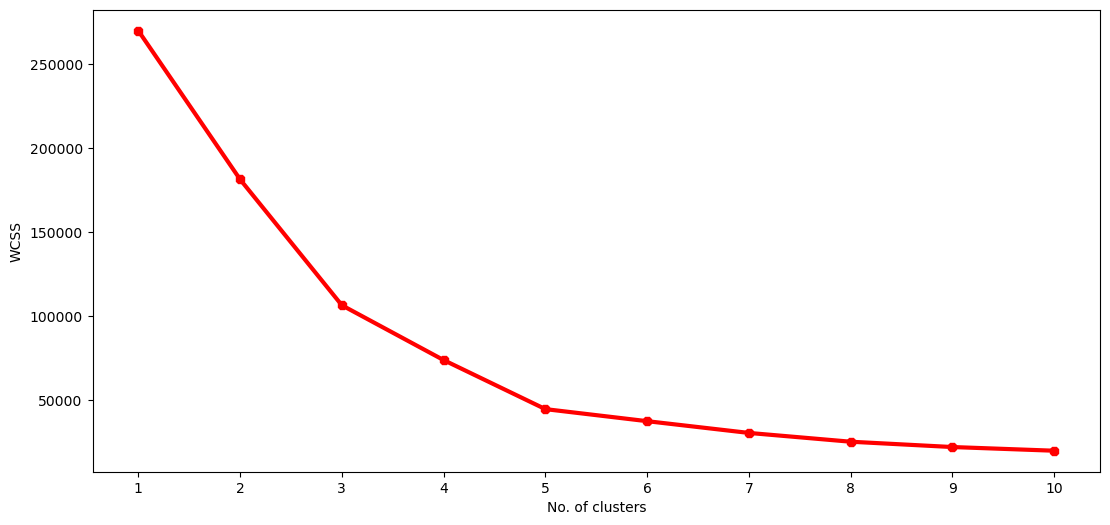

In [17]:
# plot the results for elbow method
plt.figure(figsize=(13,6))
plt.plot(range(1,11), errors)
plt.plot(range(1,11), errors, linewidth=3, color='red', marker='8')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1,11,1))
plt.show()

In [42]:
km = KMeans(n_clusters=5)
km.fit(df1)
y = km.predict(df1)
df1['Label'] = y
df1.head()

,Annual Income (k$),Spending Score (1-100),Label
0,15,39,2
1,15,81,4
2,16,6,2
3,16,77,4
4,17,40,2


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

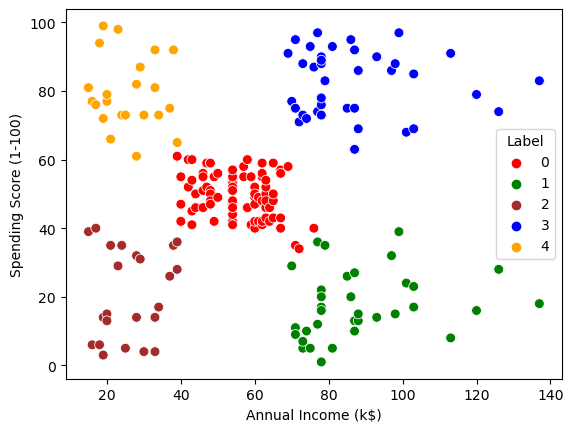

In [43]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df1, hue='Label', s=50, palette=['red', 'green', 'brown', 'blue', 'orange'])

# Result interpretation

According to the previous clustering, the customers are grouped into the following groups : 
==>People with low income but spend too much (upper-left group).
==>People with low income and low spending (lower-left group).
==>People with moderate income and moderate spending (center group).
==>People with high income and high spending (upper-right group).
==>People with high income and low spending (lower-right group).
If we have more data about these customers (like which products they buy), 
we can assume that customers within the same cluster may be interested in similar products. 
We can use this assumption to build a recommendation system for our store.